In [1]:
# CONFIG
import os

RAW_DATA_DIR = '/root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions'
TGT_DATA_DIR = os.path.join(os.path.dirname(RAW_DATA_DIR), 'dataset')

AP_YOLO_PTH = '/root/hackathon/20230617_FinalLumbarSpine/dataset/AP/weight/x6-e100-i640/weights/best.pt'
LA_YOLO_PTH = '/root/hackathon/20230617_FinalLumbarSpine/dataset/LA/weight/LA2-x6-e100-i640/weights/best.pt'

In [2]:
import os
import glob

test_files = sorted(glob.glob(os.path.join(RAW_DATA_DIR, 'test', '*.jpg')))
len(test_files)
# test_files[:400] for AP, [400:] for LA
test_files[0]
    

'/root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions/test/1600.jpg'

In [3]:
# import cv2
# from tqdm import tqdm

# CROP_TEST_DIR = '/root/hackathon/20230617_FinalLumbarSpine/crop_test'

# for file in tqdm(test_files):
#     name = file.split('/')[-1]
#     img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
#     clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
#     clahe_image = clahe.apply(img)
#     cv2.imwrite(os.path.join(CROP_TEST_DIR, name), clahe_image)

## AP

In [4]:
from ultralytics import YOLO
import numpy as np

# Load a model
AP_model = YOLO(AP_YOLO_PTH)  # load a pretrained model (recommended for training)

In [5]:
import cv2
import matplotlib.pyplot as plt

def plot_predict(path, model):

    image_path = path

    image = cv2.imread(image_path)

    results = model(image_path)

    result = results[0]
    bboxes = np.array(result.boxes.xyxy.cpu(),dtype='int')
    per_bboxes = np.array(result.boxes.xyxyn.cpu(),dtype='float32')
    classes = np.array(result.boxes.cls.cpu(),dtype='int')
    confidences = np.array(result.boxes.conf.cpu())
    class_name = result.names
    class_name_list = [class_name[i] for i in classes]
    conf_threshold = 0 

    for cls, bbox , conf in zip(classes, bboxes, confidences ):
        if conf > conf_threshold:
            x1, y1, x2, y2 = bbox
            # print(x1,y1,x2,y2)
            labels = class_name[cls]
            # print(labels)
            cv2.rectangle(image, (x1,y1),(x2,y2),(0, 255, 0), 2)
            cv2.putText(image, str(labels)+ '  Conf:' +str(np.round(conf,2)), (x1, y1-5), cv2.FONT_HERSHEY_COMPLEX, 1,(0,0,255),2 )
    plt.imshow(image, cmap='gray')
    plt.show()
    return per_bboxes


image 1/1 /root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions/test/1600.jpg: 640x352 1 L1, 1 L2, 1 L3, 1 L4, 1 L5, 174.0ms
Speed: 1.6ms preprocess, 174.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


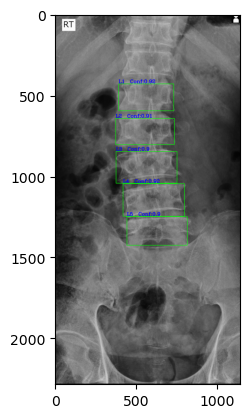

In [6]:
for i in range(1):
    test = plot_predict(test_files[i], AP_model)

## LA

In [7]:
from ultralytics import YOLO
import numpy as np

# Load a model
LA_model = YOLO(LA_YOLO_PTH)  # load a pretrained model (recommended for training)


image 1/1 /root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions/test/3600.jpg: 640x352 1 L1, 1 L2, 1 L3, 1 L4, 1 L5, 1 S1, 149.2ms
Speed: 1.5ms preprocess, 149.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


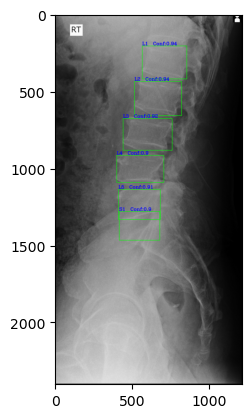

In [8]:
for i in range(400, 401):
    test = plot_predict(test_files[i], LA_model)

# Submission

In [9]:
import pandas as pd

submission_df = pd.read_csv('/root/hackathon/20230617_FinalLumbarSpine/submission.csv')
submission = submission_df.copy()
submission.head()

,id,L1a_1c,L1a_1r,L1a_2c,L1a_2r,L1b_1c,L1b_1r,L1b_2c,L1b_2r,L2a_1c,...,L5a_2c,L5a_2r,L5b_1c,L5b_1r,L5b_2c,L5b_2r,S1a_1c,S1a_1r,S1a_2c,S1a_2r
0,1600.jpg,0.351241,0.192540,0.629080,0.192540,0.349066,0.257356,0.643761,0.261169,0.341877,...,0.709001,0.548913,0.395488,0.629398,0.716624,0.620947,0.0,0.0,0.0,0.0
1,1601.jpg,0.370472,0.118349,0.590328,0.120841,0.362620,0.186452,0.588187,0.188944,0.361906,...,0.661034,0.520521,0.375366,0.614256,0.689521,0.598547,0.0,0.0,0.0,0.0
2,1602.jpg,0.489782,0.168471,0.611991,0.163413,0.487888,0.221386,0.615307,0.220996,0.492896,...,0.593634,0.498228,0.418626,0.567245,0.589159,0.571329,0.0,0.0,0.0,0.0
3,1603.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1604.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

def get_ap_bboxes(path):
    key = path.split('/')[-1]
    image_path = path
    image = cv2.imread(image_path)
    results = AP_model(image_path)
    result = results[0]
    bboxes = np.array(result.boxes.xyxyn.cpu(),dtype='float32')

    classes = np.array(result.boxes.cls.cpu(),dtype='int')
    confidences = np.array(result.boxes.conf.cpu())
    class_name = result.names
    class_name_list = [class_name[i] for i in classes]
    conf_threshold = 0 

    for cls, bbox , conf in zip(classes, bboxes, confidences):
        if conf > conf_threshold:
            x1, y1, x2, y2 = bbox
            if cls == 0 :
                submission.loc[submission['id'] == key , ['L1a_1c', 'L1a_1r', 'L1a_2c', 'L1a_2r', 'L1b_1c', 'L1b_1r','L1b_2c', 'L1b_2r']] = [x1,y1,x2,y1,x1,y2,x2,y2]
            if cls == 1 :
                submission.loc[submission['id'] == key , ['L2a_1c', 'L2a_1r', 'L2a_2c', 'L2a_2r', 'L2b_1c','L2b_1r', 'L2b_2c', 'L2b_2r']] = [x1,y1,x2,y1,x1,y2,x2,y2]
            if cls == 2 :
                submission.loc[submission['id'] == key , ['L3a_1c', 'L3a_1r', 'L3a_2c', 'L3a_2r','L3b_1c', 'L3b_1r', 'L3b_2c', 'L3b_2r']] = [x1,y1,x2,y1,x1,y2,x2,y2]
            if cls == 3 :
                submission.loc[submission['id'] == key , ['L4a_1c', 'L4a_1r', 'L4a_2c','L4a_2r', 'L4b_1c', 'L4b_1r', 'L4b_2c', 'L4b_2r']] = [x1,y1,x2,y1,x1,y2,x2,y2]
            if cls == 4 :
                submission.loc[submission['id'] == key , ['L5a_1c', 'L5a_1r','L5a_2c', 'L5a_2r', 'L5b_1c', 'L5b_1r', 'L5b_2c', 'L5b_2r',]] = [x1,y1,x2,y1,x1,y2,x2,y2]

In [11]:
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

def get_la_bboxes(path):
    key = path.split('/')[-1]
    image_path = path
    image = cv2.imread(image_path)
    results = LA_model(image_path)
    result = results[0]
    bboxes = np.array(result.boxes.xyxyn.cpu(),dtype='float32')

    classes = np.array(result.boxes.cls.cpu(),dtype='int')
    confidences = np.array(result.boxes.conf.cpu())
    class_name = result.names
    class_name_list = [class_name[i] for i in classes]
    conf_threshold = 0 

    for cls, bbox , conf in zip(classes, bboxes, confidences):
        if conf > conf_threshold:
            x1, y1, x2, y2 = bbox
            if cls == 0 :
                submission.loc[submission['id'] == key , ['L1a_1c', 'L1a_1r', 'L1a_2c', 'L1a_2r', 'L1b_1c', 'L1b_1r','L1b_2c', 'L1b_2r']] = [x1,y1,x2,y1,x1,y2,x2,y2]
            if cls == 1 :
                submission.loc[submission['id'] == key , ['L2a_1c', 'L2a_1r', 'L2a_2c', 'L2a_2r', 'L2b_1c','L2b_1r', 'L2b_2c', 'L2b_2r']] = [x1,y1,x2,y1,x1,y2,x2,y2]
            if cls == 2 :
                submission.loc[submission['id'] == key , ['L3a_1c', 'L3a_1r', 'L3a_2c', 'L3a_2r','L3b_1c', 'L3b_1r', 'L3b_2c', 'L3b_2r']] = [x1,y1,x2,y1,x1,y2,x2,y2]
            if cls == 3 :
                submission.loc[submission['id'] == key , ['L4a_1c', 'L4a_1r', 'L4a_2c','L4a_2r', 'L4b_1c', 'L4b_1r', 'L4b_2c', 'L4b_2r']] = [x1,y1,x2,y1,x1,y2,x2,y2]
            if cls == 4 :
                submission.loc[submission['id'] == key , ['L5a_1c', 'L5a_1r','L5a_2c', 'L5a_2r', 'L5b_1c', 'L5b_1r', 'L5b_2c', 'L5b_2r',]] = [x1,y1,x2,y1,x1,y2,x2,y2]
            if cls == 5 :
                submission.loc[submission['id'] == key , ['S1a_1c','S1a_1r', 'S1a_2c', 'S1a_2r']] = [x1,y2,x2,y1]

In [12]:
from tqdm import tqdm
for filename in tqdm(test_files[3:400]):
    get_ap_bboxes(filename)

  0%|          | 0/397 [00:00<?, ?it/s]
image 1/1 /root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions/test/1603.jpg: 640x352 1 L1, 1 L2, 1 L3, 1 L4, 1 L5, 149.3ms
Speed: 1.6ms preprocess, 149.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
  0%|          | 1/397 [00:00<01:24,  4.69it/s]
image 1/1 /root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions/test/1604.jpg: 640x384 1 L1, 1 L2, 1 L3, 1 L4, 1 L5, 169.2ms
Speed: 1.6ms preprocess, 169.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
  1%|          | 2/397 [00:00<01:29,  4.41it/s]
image 1/1 /root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions/test/1605.jpg: 640x512 1 L1, 1 L2, 1 L3, 1 L4, 1 L5, 203.4ms
Speed: 2.1ms preprocess, 203.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
  1%|          | 3/397 [00:00<01:41,  3.88it/s]
image 1/1 /root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions/test/16

In [13]:
from tqdm import tqdm
for filename in tqdm(test_files[400:]):
    get_la_bboxes(filename)

  0%|          | 0/400 [00:00<?, ?it/s]
image 1/1 /root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions/test/3600.jpg: 640x352 1 L1, 1 L2, 1 L3, 1 L4, 1 L5, 1 S1, 142.0ms
Speed: 1.6ms preprocess, 142.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
  0%|          | 1/400 [00:00<01:20,  4.96it/s]
image 1/1 /root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions/test/3601.jpg: 640x352 1 L1, 1 L2, 1 L3, 1 L4, 1 L5, 1 S1, 132.2ms
Speed: 1.5ms preprocess, 132.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
  0%|          | 2/400 [00:00<01:16,  5.17it/s]
image 1/1 /root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions/test/3602.jpg: 640x544 1 L1, 1 L2, 1 L3, 1 L4, 1 L5, 1 S1, 193.5ms
Speed: 2.2ms preprocess, 193.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
  1%|          | 3/400 [00:00<01:32,  4.31it/s]
image 1/1 /root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral

In [14]:
# Check submission
submission[submission.isnull().any(axis=1)]

,id,L1a_1c,L1a_1r,L1a_2c,L1a_2r,L1b_1c,L1b_1r,L1b_2c,L1b_2r,L2a_1c,...,L5a_2c,L5a_2r,L5b_1c,L5b_1r,L5b_2c,L5b_2r,S1a_1c,S1a_1r,S1a_2c,S1a_2r
3,1603.jpg,0.372357,0.227797,0.575820,0.227797,0.372357,0.292418,0.575820,0.292418,0.367693,...,0.608407,0.565399,0.350745,0.640080,0.608407,0.640080,NaN,NaN,NaN,NaN
4,1604.jpg,0.366881,0.261446,0.533777,0.261446,0.366881,0.316907,0.533777,0.316907,0.361237,...,0.566973,0.581556,0.352978,0.648168,0.566973,0.648168,NaN,NaN,NaN,NaN
5,1605.jpg,0.442303,0.347495,0.578109,0.347495,0.442303,0.401906,0.578109,0.401906,0.435646,...,0.596735,0.649533,0.414972,0.705172,0.596735,0.705172,NaN,NaN,NaN,NaN
6,1606.jpg,0.418901,0.210623,0.554273,0.210623,0.418901,0.268733,0.554273,0.268733,0.424943,...,0.614168,0.536574,0.435771,0.608879,0.614168,0.608879,NaN,NaN,NaN,NaN
7,1607.jpg,0.436348,0.064943,0.569868,0.064943,0.436348,0.123461,0.569868,0.123461,0.433427,...,0.603584,0.409391,0.429471,0.476084,0.603584,0.476084,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,1997.jpg,0.396825,0.089700,0.529649,0.089700,0.396825,0.165943,0.529649,0.165943,0.391410,...,0.544886,0.458673,0.381057,0.535252,0.544886,0.535252,NaN,NaN,NaN,NaN
398,1998.jpg,0.393219,0.227060,0.639600,0.227060,0.393219,0.293994,0.639600,0.293994,0.365152,...,0.664272,0.587645,0.356044,0.655248,0.664272,0.655248,NaN,NaN,NaN,NaN
399,1999.jpg,0.376047,0.260828,0.529207,0.260828,0.376047,0.337212,0.529207,0.337212,0.369070,...,0.570635,0.629169,0.377637,0.699448,0.570635,0.699448,NaN,NaN,NaN,NaN
639,3839.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.565932,...,0.694503,0.556928,0.551764,0.636058,0.694503,0.636058,0.556334,0.676994,0.688417,0.624087


image 1/1 /root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions/test/1813.jpg: 640x544 1 L1, 2 L2s, 2 L4s, 2 L5s, 200.0ms
Speed: 2.3ms preprocess, 200.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


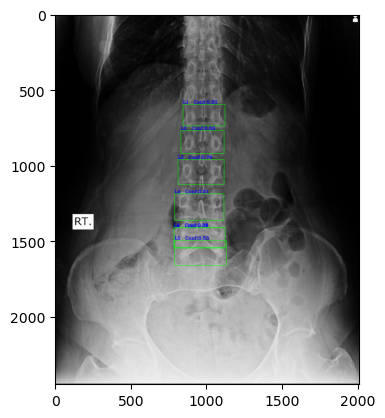

In [15]:
test = plot_predict(test_files[213], AP_model)

In [16]:
test

array([[     0.4195,     0.24434,     0.55736,     0.30239],
       [    0.39245,     0.48591,     0.55375,     0.55755],
       [    0.40313,     0.39369,     0.55446,     0.46065],
       [      0.413,     0.31495,     0.55457,     0.37701],
       [    0.38978,     0.57779,     0.55809,     0.63261],
       [    0.39217,     0.61202,     0.56251,     0.67961],
       [    0.39062,     0.57698,     0.55776,     0.63088]], dtype=float32)

In [17]:
test_files[213]

'/root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions/test/1813.jpg'

image 1/1 /root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions/test/3839.jpg: 640x544 1 L2, 1 L3, 1 L4, 1 L5, 1 S1, 210.2ms
Speed: 2.5ms preprocess, 210.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


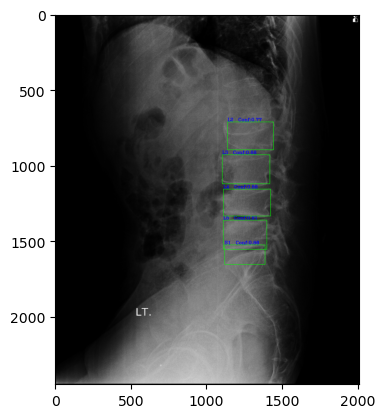

array([[    0.55176,     0.55693,      0.6945,     0.63606],
       [    0.54845,     0.38033,     0.70443,     0.45886],
       [    0.55232,     0.47341,     0.70718,     0.54608],
       [    0.55633,     0.62409,     0.68842,     0.67699],
       [    0.56593,     0.29177,      0.7166,     0.36709]], dtype=float32)

In [18]:
plot_predict(test_files[639], LA_model)


image 1/1 /root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions/test/3849.jpg: 640x416 1 L1, 1 L2, 1 L3, 1 L4, 1 L5, 8.4ms
Speed: 2.0ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


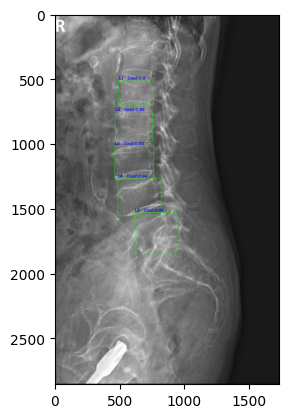

array([[    0.28094,     0.44372,     0.47362,     0.54537],
       [    0.26705,     0.35502,     0.44108,     0.44324],
       [    0.26854,     0.26341,     0.43446,     0.34456],
       [    0.35702,     0.53578,     0.53992,     0.64832],
       [    0.28451,     0.17838,     0.43823,     0.24558]], dtype=float32)

In [79]:
plot_predict(test_files[649], LA_model)

## Handle submission

In [21]:
# Check submission
prob_index_list = list(submission[submission.isnull().any(axis=1)].index)
prob_index_list

[3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,


In [22]:
final_submission = submission.copy()

In [117]:
for index in prob_index_list:
    cols = final_submission.columns[final_submission.iloc[index].isnull()]
    cols = list(set([col[:2] for col in cols]))
    row = final_submission.iloc[index]
    key = row['id']
    for col in sorted(cols, reverse=True): # Sorted like S1, L5, L4, ..., L1
        if col == 'S1':
            final_submission.loc[final_submission['id'] == key , ['S1a_1c','S1a_1r', 'S1a_2c', 'S1a_2r']] = [row.L5b_1c,row.L5b_1r,row.L5b_2c,row.L5b_2r]
        elif col != 'L5':
            colb = str(list(col)[0]) + str(int(list(col)[1])+1)
            raw_list = [col+txt for txt in ['a_1c', 'a_1r', 'a_2c', 'a_2r', 'b_1c', 'b_1r', 'b_2c', 'b_2r']]
            replace_list = [
                # Upper line + height
                row[f'{colb}a_1c'],
                row[f'{colb}a_1r'] - abs(row[f'{colb}a_1r'] - row[f'{colb}b_1r']),
                row[f'{colb}a_2c'],
                row[f'{colb}a_2r'] - abs(row[f'{colb}a_2r'] - row[f'{colb}b_2r']),
                # Upper line of next spine
                row[f'{colb}a_1c'],
                row[f'{colb}a_1r'],
                row[f'{colb}a_2c'],
                row[f'{colb}a_2r'],
            ]
            final_submission.loc[final_submission['id'] == key , raw_list] = replace_list
        else: #L5
            colb = 'L4'
            raw_list = [col+txt for txt in ['a_1c', 'a_1r', 'a_2c', 'a_2r', 'b_1c', 'b_1r', 'b_2c', 'b_2r']]
            replace_list = [
                # Upper line from bot of L4
                row[f'{colb}b_1c'],
                row[f'{colb}b_1r'],
                row[f'{colb}b_2c'],
                row[f'{colb}b_2r'],
                # Upper line from top of S1
                row[f'{colb}b_1c'],
                row[f'{colb}b_1r'] + abs(row[f'{colb}a_1r'] - row[f'{colb}b_1r']),
                row[f'{colb}b_2c'],
                row[f'{colb}b_2r'] + abs(row[f'{colb}a_1r'] - row[f'{colb}b_1r']),
            ]

In [23]:
final_submission[final_submission.isnull().any(axis=1)]

,id,L1a_1c,L1a_1r,L1a_2c,L1a_2r,L1b_1c,L1b_1r,L1b_2c,L1b_2r,L2a_1c,...,L5a_2c,L5a_2r,L5b_1c,L5b_1r,L5b_2c,L5b_2r,S1a_1c,S1a_1r,S1a_2c,S1a_2r
3,1603.jpg,0.372357,0.227797,0.575820,0.227797,0.372357,0.292418,0.575820,0.292418,0.367693,...,0.608407,0.565399,0.350745,0.640080,0.608407,0.640080,NaN,NaN,NaN,NaN
4,1604.jpg,0.366881,0.261446,0.533777,0.261446,0.366881,0.316907,0.533777,0.316907,0.361237,...,0.566973,0.581556,0.352978,0.648168,0.566973,0.648168,NaN,NaN,NaN,NaN
5,1605.jpg,0.442303,0.347495,0.578109,0.347495,0.442303,0.401906,0.578109,0.401906,0.435646,...,0.596735,0.649533,0.414972,0.705172,0.596735,0.705172,NaN,NaN,NaN,NaN
6,1606.jpg,0.418901,0.210623,0.554273,0.210623,0.418901,0.268733,0.554273,0.268733,0.424943,...,0.614168,0.536574,0.435771,0.608879,0.614168,0.608879,NaN,NaN,NaN,NaN
7,1607.jpg,0.436348,0.064943,0.569868,0.064943,0.436348,0.123461,0.569868,0.123461,0.433427,...,0.603584,0.409391,0.429471,0.476084,0.603584,0.476084,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,1997.jpg,0.396825,0.089700,0.529649,0.089700,0.396825,0.165943,0.529649,0.165943,0.391410,...,0.544886,0.458673,0.381057,0.535252,0.544886,0.535252,NaN,NaN,NaN,NaN
398,1998.jpg,0.393219,0.227060,0.639600,0.227060,0.393219,0.293994,0.639600,0.293994,0.365152,...,0.664272,0.587645,0.356044,0.655248,0.664272,0.655248,NaN,NaN,NaN,NaN
399,1999.jpg,0.376047,0.260828,0.529207,0.260828,0.376047,0.337212,0.529207,0.337212,0.369070,...,0.570635,0.629169,0.377637,0.699448,0.570635,0.699448,NaN,NaN,NaN,NaN
639,3839.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.565932,...,0.694503,0.556928,0.551764,0.636058,0.694503,0.636058,0.556334,0.676994,0.688417,0.624087


In [120]:
SUBMIT_DIR = '/root/hackathon/20230617_FinalLumbarSpine/submit'
final_submission.to_csv(os.path.join(SUBMIT_DIR, 'normal_yolo2.csv'), index=False)